# Film Jamz

Jingyi, Aidan, Micheal, Zhimin

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load Data

Load the data from csv file. It contains 6820 records. Each record has these values:

**Response Variable：**
* Default or Not      

**Predictor Variables:**
1. company: the production company   
2. country: country of origin                  
3. director: the director   
4. genre: main genre of the movie                          
5. gross: revenue of the movie                 
6. name: name of the movie       
7. rating: rating of the movie              
8. runtime: duration of the movie           
9. score: IMDb user rating    
10. votes: number of user votes

The goal of this project is to build an analyzing modle for potential investors in movie industry to indicate which feature will most likely be the key to success for future movies.

In [14]:
import pandas as pd
df=pd.read_csv('./data/movies.csv')
#print list(df.columns.values)
#print df.info() # basic information
#print data.describe() # basic statistics
df.head()



company country        director      genre  \
0           Columbia Pictures Corporation     USA      Rob Reiner  Adventure   
1                      Paramount Pictures     USA     John Hughes     Comedy   
2                      Paramount Pictures     USA      Tony Scott     Action   
3  Twentieth Century Fox Film Corporation     USA   James Cameron     Action   
4                    Walt Disney Pictures     USA  Randal Kleiser  Adventure   

       gross                      name rating  runtime  score  \
0   52287414               Stand by Me      R       89    8.1   
1   70136369  Ferris Bueller's Day Off  PG-13      103    7.8   
2  179800601                   Top Gun     PG      110    6.9   
3   85160248                    Aliens      R      137    8.4   
4   18564613   Flight of the Navigator     PG       90    6.9   

                star   votes         writer  
0        Wil Wheaton  299174   Stephen King  
1  Matthew Broderick  264740    John Hughes  
2         Tom Cruise  236909       Jim Cash  
3   Sigourney Weaver  540152  James Cameron  
4        Joey Cramer   36636  Mark H. Baker

## Missing value:

Replace all nan values as mean values.

In [15]:
from sklearn import preprocessing
from sklearn import utils
#numric the strings(replace unique string with a unique number)
le = preprocessing.LabelEncoder()
df['company'] = le.fit_transform(df['company'])
df['country'] = le.fit_transform(df['country'])
df['director'] = le.fit_transform(df['director'])
df['name'] = le.fit_transform(df['name'])
df['rating'] = le.fit_transform(df['rating'])
df['star'] = le.fit_transform(df['star'])
df['writer'] = le.fit_transform(df['writer'])
df['genre'] = le.fit_transform(df['genre'])

y=df.iloc[:,4].fillna(df.mean()).as_matrix()
x=df.iloc[:, 0:].fillna(df.mean()).as_matrix()
x = np.delete(x, 4, axis = 1)
y = y.astype('int')

print y.shape
print x.shape

x = preprocessing.StandardScaler().fit_transform(x)
df.head()

(6820,)
(6820, 11)


company  country  director  genre      gross  name  rating  runtime  score  \
0      665       54      2192      1   52287414  4661       8       89    8.1   
1     1680       54      1296      4   70136369  1821       7      103    7.8   
2     1680       54      2645      0  179800601  6203       6      110    6.9   
3     2062       54      1066      0   85160248   295       8      137    8.4   
4     2122       54      2123      1   18564613  1872       6       90    6.9   

   star   votes  writer  
0  2454  299174    3716  
1  1605  264740    1970  
2  2345  236909    1852  
3  2192  540152    1629  
4  1139   36636    2549

In [16]:
#use Random Forest Regressor as the algrithm
from sklearn.ensemble import RandomForestRegressor
# Logistic Classification
regressify = RandomForestRegressor() # You can adjust some paraments here.
regressify.fit(x,y)

y_pred = regressify.predict(x)
regressif_rate = np.mean(y_pred.ravel() == y.ravel()) * 100
print("regressif_rate for %s : %f " % ('RandomForestRegressor', regressif_rate))
print regressify.feature_importances_


regressif_rate for RandomForestRegressor : 1.055718 
[ 0.02991191  0.01753486  0.03704226  0.04053636  0.04209286  0.11428336
  0.04571328  0.04629939  0.02677471  0.56932949  0.03048152]


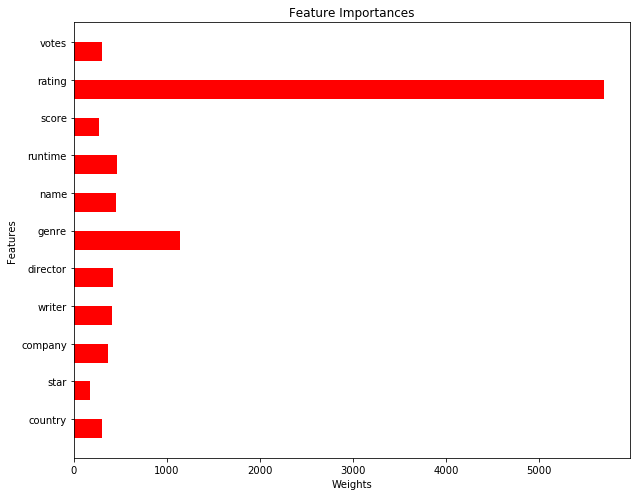

In [17]:
#form a chart for the best feature
features=np.array([ "company",
                    "country",
                    "director",
                    "genre",
                    
                    "name",
                    "rating",
                    "runtime",
                    "score",
                    "star",
                    "votes",
                    "writer"
                    ])
new = [i * 10000 for i in regressify.feature_importances_]
#print new
ind=sorted(range(len(new)),reverse=False,key=lambda k: new[k])
features=features[ind]

ind=np.array(range(11))
#print ind
plt.rcParams['figure.figsize'] = (9,7)
plt.barh(bottom=ind,height=0.5,width=new,color='r')
plt.yticks(ind+0.25,features)
plt.xlabel('Weights')
plt.ylabel('Features')
plt.title('Feature Importances')
#plt.subplots_adjust(left=0.2)
plt.tight_layout()
#plt.savefig('feature_importances.png', format='png', dpi=300)
plt.show()